In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline


In [2]:
# Download stock data for Google (GOOG) for the past 1 year
df = yf.download("GOOG", period="1y")

# Show first 5 rows
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-04-01,155.762238,156.259880,150.935095,151.114254,24469800
2024-04-02,155.135193,155.254637,152.736566,154.020478,17598100
2024-04-03,155.632843,155.812002,153.405402,154.189682,17266200
2024-04-04,151.223724,155.443726,151.164010,154.348921,24184800
2024-04-05,153.214325,154.110076,150.368794,150.964969,16289800


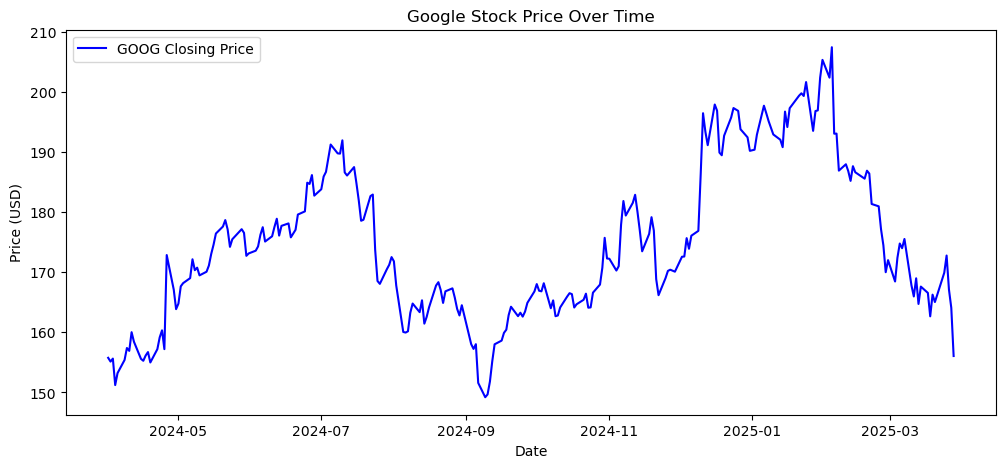

In [3]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"], label="GOOG Closing Price", color="blue")

plt.title("Google Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


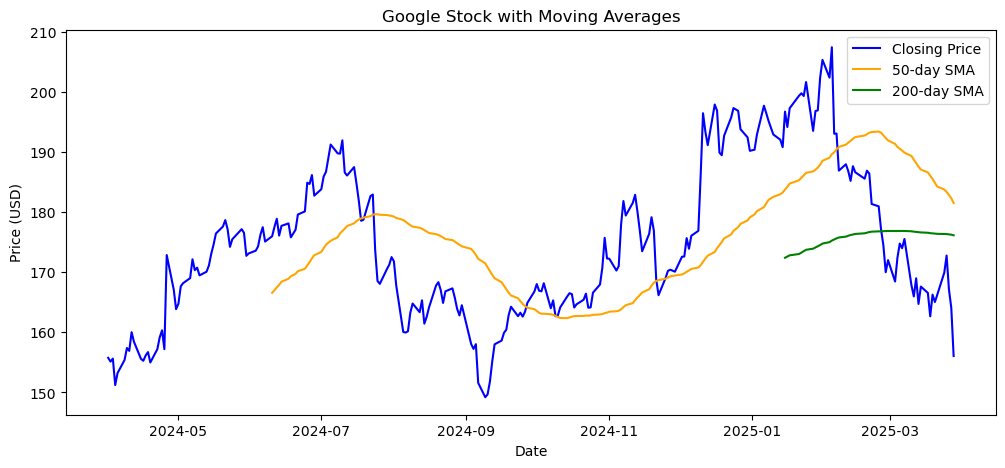

In [4]:
# Calculate moving averages
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()

# Plot with moving averages
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.plot(df.index, df["SMA_50"], label="50-day SMA", color="orange")
plt.plot(df.index, df["SMA_200"], label="200-day SMA", color="green")

plt.title("Google Stock with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [5]:
df["Signal"] = 0  # Default no signal
df.loc[df["SMA_50"] > df["SMA_200"], "Signal"] = 1  # Buy Signal
df.loc[df["SMA_50"] < df["SMA_200"], "Signal"] = -1  # Sell Signal

# Show where crossovers occur
df[["Close", "SMA_50", "SMA_200", "Signal"]].tail(10)


Price,Close,SMA_50,SMA_200,Signal
Ticker,GOOG,,,
Date,,,,
2025-03-17,166.570007,186.629804,176.584995,1
2025-03-18,162.669998,186.074943,176.515527,1
2025-03-19,166.279999,185.542338,176.483218,1
2025-03-20,165.050003,184.888643,176.442768,1
2025-03-21,166.250000,184.283920,176.406029,1
2025-03-24,169.929993,183.779167,176.384157,1
2025-03-25,172.789993,183.375963,176.366931,1
2025-03-26,167.139999,182.877340,176.315084,1


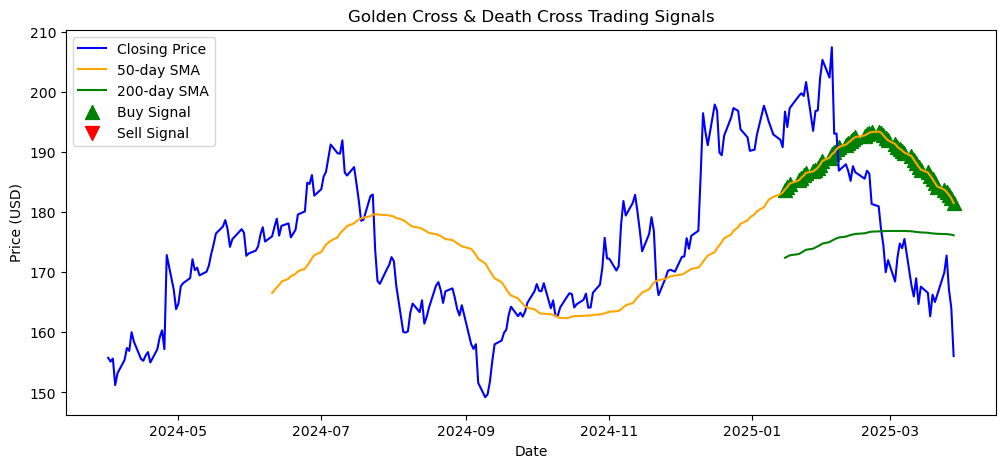

In [6]:
plt.figure(figsize=(12,5))

# Plot Closing Price & Moving Averages
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.plot(df.index, df["SMA_50"], label="50-day SMA", color="orange")
plt.plot(df.index, df["SMA_200"], label="200-day SMA", color="green")

# Plot Buy Signals
plt.scatter(df.index[df["Signal"] == 1], df["SMA_50"][df["Signal"] == 1], marker="^", color="green", label="Buy Signal", s=100)

# Plot Sell Signals
plt.scatter(df.index[df["Signal"] == -1], df["SMA_50"][df["Signal"] == -1], marker="v", color="red", label="Sell Signal", s=100)

plt.title("Golden Cross & Death Cross Trading Signals")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
